In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='0'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
import tensorflow as tf

import sys
sys.path.append('/home/bis/2021_SJH_detectability/DbyDeep')
from model_DbyDeep_train import get_npy_DbyDeep

2023-03-20 01:32:43.155682: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 01:32:44.196985: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-20 01:32:44.198041: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-20 01:32:44.230993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-20 01:32:44.231042: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 01:32:44.234606: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-0

In [2]:
# gpu setting
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*4)])
    except RuntimeError as e:
        print(e)

In [3]:
print('Loading model...')
model = keras.models.load_model("/home/bis/2021_SJH_detectability/DbyDeep/log/model_DbyDeep_04_False.h5")
model.summary()

2023-03-20 01:32:44.412939: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading model...


2023-03-20 01:32:44.417795: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-20 01:32:44.419244: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2023-03-20 01:32:44.419325: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-03-20 01:32:44.419350: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-20 01:32:44.419363: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-03-20 01:32:44.419376: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2023

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 15)]         0                                            
______________________________________________________________________________________________

In [4]:
df_massive=pd.read_csv('/data/2021_SJH_detectability/data_human/train.csv')
df_hpp=pd.read_csv('/data/2021_SJH_detectability/data_human/HPP.csv')
df_merge=pd.DataFrame(np.concatenate([df_massive.peptide.unique(), df_hpp.peptide.unique()]), columns=['peptide'])
df_merge['Drop']=True

# Cross Species - Mouse

Loading input peptides


2023-03-20 01:36:10.840652: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 414144640 exceeds 10% of free system memory.
2023-03-20 01:36:11.829334: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-20 01:36:11.849728: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3000000000 Hz
2023-03-20 01:36:19.899019: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2023-03-20 01:36:20.662570: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2023-03-20 01:36:20.748938: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2023-03-20 01:36:22.882614: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only 

40444/40444 [==============================] - 1747s 43ms/step - loss: 0.7637 - accuracy: 0.6829
Test Loss: 0.7637183666229248
Test Accuracy: 0.6829204559326172
Test AUC : 0.9078741371533783
              precision    recall  f1-score   support

       False     0.9971    0.6724    0.8031   1245024
        True     0.1028    0.9500    0.1855     49178

    accuracy                         0.6829   1294202
   macro avg     0.5499    0.8112    0.4943   1294202
weighted avg     0.9631    0.6829    0.7797   1294202



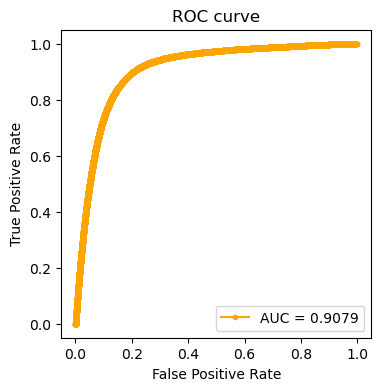

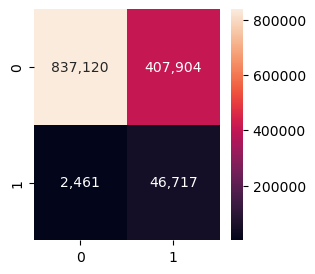

In [7]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/KLife/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/KLife/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_KLife_DbyDeep_fpr.npy', fpr)
np.save('log/result_mouse_KLife_DbyDeep_tpr.npy', tpr)
np.save('log/result_mouse_KLife_DbyDeep_threshold.npy', threshold)
np.save('log/result_mouse_KLife_DbyDeep_probs.npy', probs)
np.save('log/result_mouse_KLife_DbyDeep_true.npy', label_test)

Loading input peptides


2023-03-20 02:24:33.457483: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360638080 exceeds 10% of free system memory.
2023-03-20 02:40:51.926235: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360638080 exceeds 10% of free system memory.


35219/35219 [==============================] - 1173s 33ms/step - loss: 0.7753 - accuracy: 0.6814
Test Loss: 0.7753486633300781
Test Accuracy: 0.6813567876815796
Test AUC : 0.8873188075417138
              precision    recall  f1-score   support

       False     0.9959    0.6709    0.8017   1082006
        True     0.1054    0.9330    0.1895     44988

    accuracy                         0.6814   1126994
   macro avg     0.5507    0.8020    0.4956   1126994
weighted avg     0.9603    0.6814    0.7773   1126994



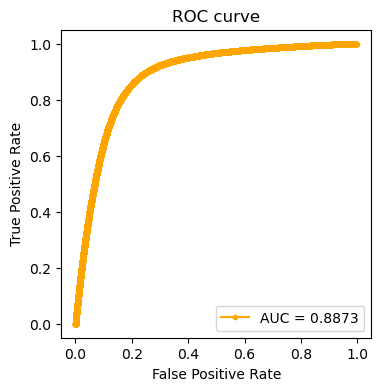

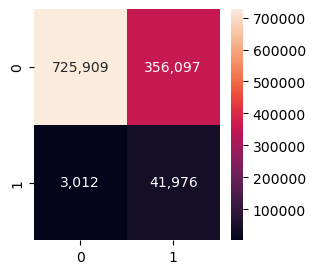

In [8]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/SkeletaMuscle/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/mouse/SkeletaMuscle/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_SkeletaMuscle_DbyDeep_fpr.npy', fpr)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_tpr.npy', tpr)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_threshold.npy', threshold)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_probs.npy', probs)
np.save('log/result_mouse_SkeletaMuscle_DbyDeep_true.npy', label_test)

# Cross Species - Human

Loading input peptides


2023-03-20 03:01:26.742866: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 448074560 exceeds 10% of free system memory.


43758/43758 [==============================] - 1273s 29ms/step - loss: 0.6794 - accuracy: 0.7134
Test Loss: 0.6793953776359558
Test Accuracy: 0.7133505344390869
Test AUC : 0.8640003696060894
              precision    recall  f1-score   support

       False     0.9940    0.7078    0.8268   1353817
        True     0.0932    0.8759    0.1685     46416

    accuracy                         0.7134   1400233
   macro avg     0.5436    0.7918    0.4976   1400233
weighted avg     0.9642    0.7134    0.8050   1400233



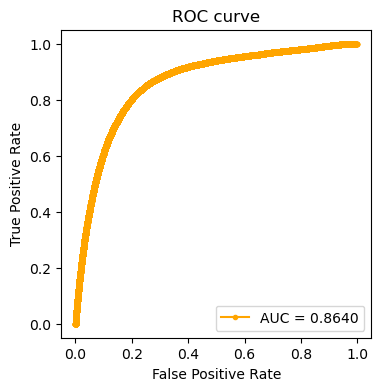

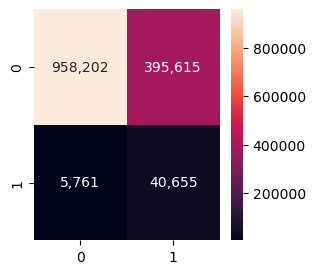

In [9]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HEK293/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HEK293/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HEK293_DbyDeep_fpr.npy', fpr)
np.save('log/result_human_HEK293_DbyDeep_tpr.npy', tpr)
np.save('log/result_human_HEK293_DbyDeep_threshold.npy', threshold)
np.save('log/result_human_HEK293_DbyDeep_probs.npy', probs)
np.save('log/result_human_HEK293_DbyDeep_true.npy', label_test)

Loading input peptides
31602/31602 [==============================] - 897s 28ms/step - loss: 0.7123 - accuracy: 0.7033
Test Loss: 0.7122906446456909
Test Accuracy: 0.703257143497467
Test AUC : 0.8114142498554506
              precision    recall  f1-score   support

       False     0.9947    0.7017    0.8229    993639
        True     0.0448    0.7898    0.0848     17607

    accuracy                         0.7033   1011246
   macro avg     0.5198    0.7458    0.4539   1011246
weighted avg     0.9782    0.7033    0.8101   1011246



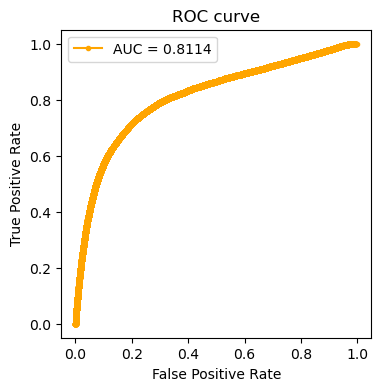

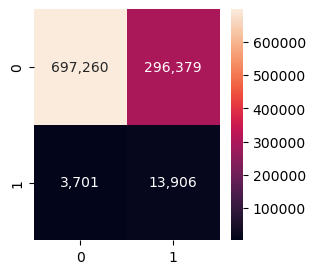

In [10]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HmapLiver/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/human/HmapLiver/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HmapLiver_DbyDeep_fpr.npy', fpr)
np.save('log/result_human_HmapLiver_DbyDeep_tpr.npy', tpr)
np.save('log/result_human_HmapLiver_DbyDeep_threshold.npy', threshold)
np.save('log/result_human_HmapLiver_DbyDeep_probs.npy', probs)
np.save('log/result_human_HmapLiver_DbyDeep_true.npy', label_test)

# Cross Species - Yeast

Loading input peptides
17306/17306 [==============================] - 509s 29ms/step - loss: 0.8657 - accuracy: 0.6514
Test Loss: 0.8656774759292603
Test Accuracy: 0.6513673663139343
Test AUC : 0.8729977542091335
              precision    recall  f1-score   support

       False     0.9933    0.6336    0.7737    520802
        True     0.1388    0.9327    0.2416     32970

    accuracy                         0.6514    553772
   macro avg     0.5660    0.7831    0.5076    553772
weighted avg     0.9424    0.6514    0.7420    553772



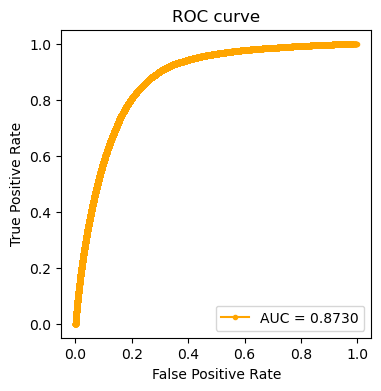

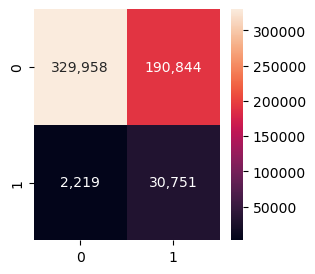

In [11]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/DelPBP1/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/DelPBP1/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_DelPBP1_DbyDeep_fpr.npy', fpr)
np.save('log/result_yeast_DelPBP1_DbyDeep_tpr.npy', tpr)
np.save('log/result_yeast_DelPBP1_DbyDeep_threshold.npy', threshold)
np.save('log/result_yeast_DelPBP1_DbyDeep_probs.npy', probs)
np.save('log/result_yeast_DelPBP1_DbyDeep_true.npy', label_test)

Loading input peptides
19998/19998 [==============================] - 581s 29ms/step - loss: 0.6747 - accuracy: 0.7103
Test Loss: 0.6747361421585083
Test Accuracy: 0.710284948348999
Test AUC : 0.906530937547003
              precision    recall  f1-score   support

       False     0.9873    0.6787    0.8044    561767
        True     0.2887    0.9375    0.4414     78148

    accuracy                         0.7103    639915
   macro avg     0.6380    0.8081    0.6229    639915
weighted avg     0.9020    0.7103    0.7601    639915



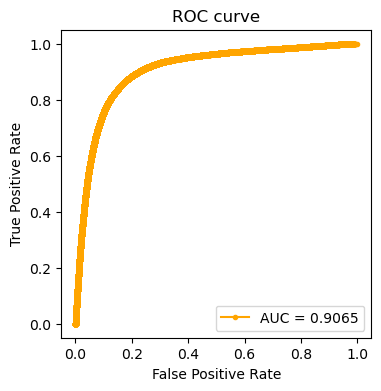

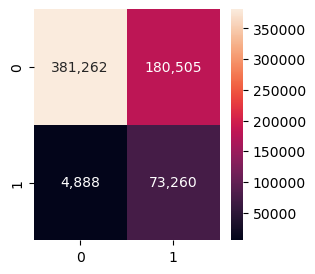

In [12]:
df_test = pd.concat([
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/KLife/train.csv'),
    pd.read_csv('/data/2021_SJH_detectability/data_cross_species/raw/yeast/KLife/test.csv'),
])
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.nterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.cterm.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss1.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.miss2.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
pep_test, n_test, c_test, m1_test, m2_test, label_test = get_npy_DbyDeep(df_test)

probs = model.predict([pep_test, n_test, c_test, m1_test, m2_test])
y_pred = [1 if i>=0.5 else 0 for i in probs]
loss, acc = model.evaluate([pep_test, n_test, c_test, m1_test, m2_test], label_test)
auc = roc_auc_score(label_test, probs)

print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(label_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(label_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(label_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_KLife_DbyDeep_fpr.npy', fpr)
np.save('log/result_yeast_KLife_DbyDeep_tpr.npy', tpr)
np.save('log/result_yeast_KLife_DbyDeep_threshold.npy', threshold)
np.save('log/result_yeast_KLife_DbyDeep_probs.npy', probs)
np.save('log/result_yeast_KLife_DbyDeep_true.npy', label_test)